In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv("./data.csv")

In [8]:
data.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [9]:
data_mean = data.copy()
data_mean.iloc[:,1:3] = data_mean.iloc[:,1:3].fillna(value="None")
means = data.iloc[:,3:10].mean()
data_mean.iloc[:,3:10] = data_mean.iloc[:,3:10].fillna(value=means)

In [6]:
%conda create -c conda-forge -n pymc_env "pymc>=4"

^C

Note: you may need to restart the kernel to use updated packages.


In [42]:
import pymc3 as pm
import re

colnames = [re.sub("\s+\[.*\]", "", s) for s in data.columns]
data.columns = colnames
plus = " + "
formula = data.columns[3] + " ~ " + plus.join(data.columns[4:10])
#formula = "pressure ~ mass_flux + length"
formula

'pressure ~ mass_flux + x_e_out + D_e + D_h + length + chf_exp'

In [45]:
with pm.Model() as normal_model:
    family = pm.glm.families.Normal()
    pm.GLM.from_formula(formula, data = data, family = family)
    step = pm.Metropolis()
    normal_trace = pm.sample(draws=2000, chains=2, tune=500, step=step)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
c:\Users\Sam\anaconda3\envs\pymc_env\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [chf_exp]
>Metropolis: [length]
>Metropolis: [D_h]
>Metropolis: [D_e]
>Metropolis: [x_e_out]
>Metropolis: [mass_flux]
>Metropolis: [Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 39 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


C:\Users\Sam\AppData\Local\Temp\ipykernel_44440\1168672415.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(normal_trace)
c:\Users\Sam\anaconda3\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'mass_flux'}>,
        <Axes: title={'center': 'mass_flux'}>],
       [<Axes: title={'center': 'x_e_out'}>,
        <Axes: title={'center': 'x_e_out'}>],
       [<Axes: title={'center': 'D_e'}>, <Axes: title={'center': 'D_e'}>],
       [<Axes: title={'center': 'D_h'}>, <Axes: title={'center': 'D_h'}>],
       [<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'chf_exp'}>,
        <Axes: title={'center': 'chf_exp'}>],
       [<Axes: title={'center': 'sd'}>, <Axes: title={'center': 'sd'}>]],
      dtype=object)

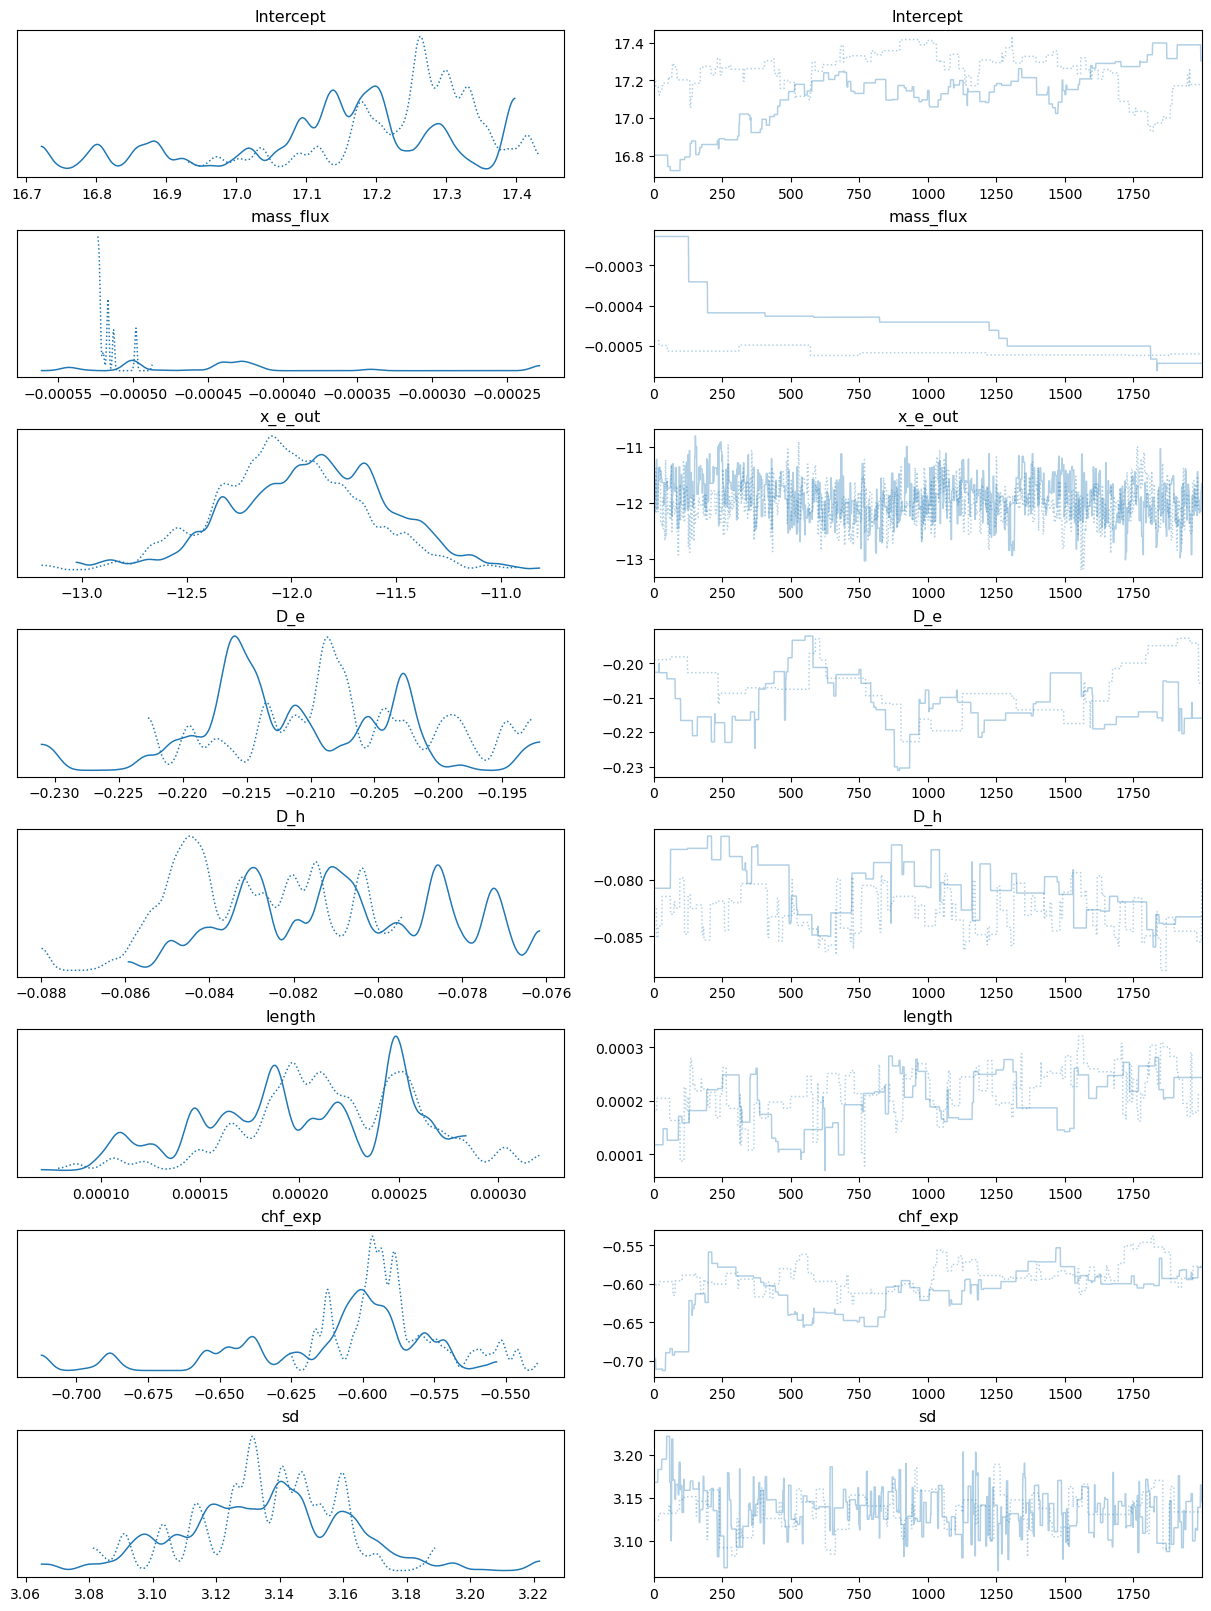

In [46]:
pm.traceplot(normal_trace)

In [32]:
normal_trace = pm.sample(draws=2000, chains=2, tune=500)

TypeError: No model on context stack.